Problem 2

In [1]:
%matplotlib inline
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import emcee
import corner
import pdb

(a)

To draw a sample from known distribution, we need to calculate its cummulative inverse function. Note that this function is different when alpha is 1 or not.

In [2]:
def cdf_inv_pl(m_min, m_max, alpha, N):
    """
    use cummulative inverse function to create samples with power law function"""
    y = np.random.random(N)
    if alpha == 1:
        x = np.exp(y*(np.log(m_max/m_min)) + np.log(m_min))
    else:
        x = (y*(m_max**(1-alpha) - m_min**(1-alpha)) + m_min**(1-alpha))**(1/(1-alpha))
    return x

(b)

use emcee to infer the m_max and alpha.

In [3]:
def ln_prior(theta):
    """
    assume a flat posterior"""
    m_max = theta[0]
    alpha = theta[1]
    if m_max>500:
        return np.log(1e-100)
    else:
        return 0

def pl(m, m_min, m_max, alpha):
    """
    return the power law given m."""
    if alpha == 1:
        pl_m = (m*np.log(m_max/m_min))**(-1)
    else:
        pl_m = (1-alpha)*(m**(-alpha))/(m_max**(1-alpha) - m_min**(1-alpha))
    idx = np.where((m<m_min)|(m>m_max))[0]
    pl_m[idx] = 1e-9
    return pl_m

def ln_likelyhood(theta, data):
    """
    curving fitting on a histogram of the given data"""
    m_min = 3
    m_max = theta[0]
    alpha = theta[1]
    pl_m = pl(data, m_min, m_max, alpha)
    return np.sum(np.log(pl_m))

def ln_posterior(theta, data):
    return ln_prior(theta) + ln_likelyhood(theta, data)
    

(c)



for 1000 data points:
the best fit value to m_max is 14.96
the true value to m_max is 15.00
the best fit value is away from true value of 0.058 sigma

the best fit value to alpha is 1.43
the true value to alpha is 1.35
the best fit value is away from true value of 0.228 sigma


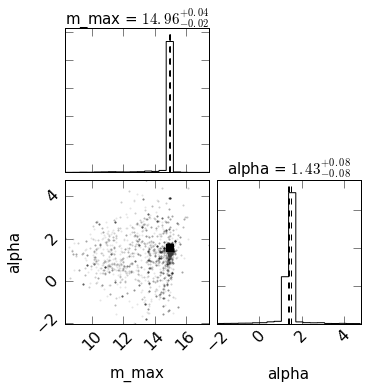

In [23]:
# generate fake data
def find_theta(N, theta0=[10,1.1], plot_result=True):
    m_min_real = 3
    m_max_real = 15
    alpha_real = 1.35
    data = cdf_inv_pl(m_min_real, m_max_real, alpha_real, N)

    #pdb.set_trace()
    # use emcee to infer m_max and alpha
    steps = 500
    nwalkers = 50
    ndim = 2
    sampler = emcee.EnsembleSampler(nwalkers, ndim, ln_posterior, args=[data])
    pos = [np.random.normal((theta0)) for i in range(nwalkers)]
    sampler.run_mcmc(pos, steps)
    theta = sampler.chain.reshape((-1, ndim))

    # plot the best fitting result
    if plot_result == True:
        plt.clf()
        corner.corner(theta, labels=['m_max', 'alpha'], quantiles=[0.16, 0.5, 0.84], show_titles=True)
        m_max_best = np.median(theta[:,0])
        m_max_std = np.std(theta[:,0])
        m_max_sigma = np.abs(m_max_best - m_max_real)/m_max_std
        print('for %d data points:' %(N))
        print('the best fit value to m_max is %.2f' %(m_max_best))
        print('the true value to m_max is %.2f' %(m_max_real))
        print('the best fit value is away from true value of %.3f sigma\n' %(m_max_sigma))
        alpha_best = np.median(theta[:,1])
        alpha_std = np.std(theta[:,1])
        alpha_sigma = np.abs(alpha_best - alpha_real)/alpha_std
        print('the best fit value to alpha is %.2f' %(alpha_best))
        print('the true value to alpha is %.2f' %(alpha_real))
        print('the best fit value is away from true value of %.3f sigma' %(alpha_sigma))
    return theta
    
theta = find_theta(1000)

(d)

/Users/siyao/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:17: RuntimeWarning: invalid value encountered in double_scalars


for 10 data points:
the best fit value to m_max is 44.15
the true value to m_max is 15.00
the best fit value is away from true value of 0.193 sigma

the best fit value to alpha is 2.17
the true value to alpha is 1.35
the best fit value is away from true value of 0.605 sigma


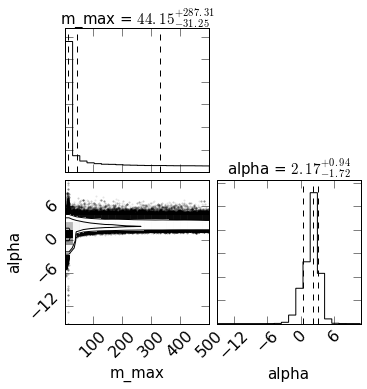

In [38]:
N=10
# for samll data sets, generate multiple data sets
N_sets = 50
theta_temp = np.zeros((N_sets, 25000, 2))
for i in range(N_sets):
    theta_temp[i] = find_theta(10, plot_result=False)
theta = np.reshape(theta_temp, (25000*N_sets, 2))
plt.clf()
corner.corner(theta, labels=['m_max', 'alpha'], quantiles=[0.16, 0.5, 0.84], show_titles=True)
m_max_best = np.median(theta[:,0])
m_max_std = np.std(theta[:,0])
m_max_sigma = np.abs(m_max_best - m_max_real)/m_max_std
print('for %d data points:' %(N))
print('the best fit value to m_max is %.2f' %(m_max_best))
print('the true value to m_max is %.2f' %(m_max_real))
print('the best fit value is away from true value of %.3f sigma\n' %(m_max_sigma))
alpha_best = np.median(theta[:,1])
alpha_std = np.std(theta[:,1])
alpha_sigma = np.abs(alpha_best - alpha_real)/alpha_std
print('the best fit value to alpha is %.2f' %(alpha_best))
print('the true value to alpha is %.2f' %(alpha_real))
print('the best fit value is away from true value of %.3f sigma' %(alpha_sigma))

/Users/siyao/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:17: RuntimeWarning: invalid value encountered in double_scalars


for 100 data points:
the best fit value to m_max is 34.89
the true value to m_max is 15.00
the best fit value is away from true value of 0.132 sigma

the best fit value to alpha is 2.02
the true value to alpha is 1.35
the best fit value is away from true value of 0.403 sigma


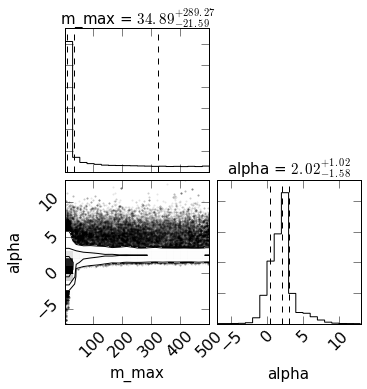

In [42]:
N=100
# for samll data sets, generate multiple data sets
N_sets = 10
theta_temp = np.zeros((N_sets, 25000, 2))
for i in range(N_sets):
    theta_temp[i] = find_theta(10, plot_result=False)
theta = np.reshape(theta_temp, (25000*N_sets, 2))
plt.clf()
corner.corner(theta, labels=['m_max', 'alpha'], quantiles=[0.16, 0.5, 0.84], show_titles=True)
m_max_best = np.median(theta[:,0])
m_max_std = np.std(theta[:,0])
m_max_sigma = np.abs(m_max_best - m_max_real)/m_max_std
print('for %d data points:' %(N))
print('the best fit value to m_max is %.2f' %(m_max_best))
print('the true value to m_max is %.2f' %(m_max_real))
print('the best fit value is away from true value of %.3f sigma\n' %(m_max_sigma))
alpha_best = np.median(theta[:,1])
alpha_std = np.std(theta[:,1])
alpha_sigma = np.abs(alpha_best - alpha_real)/alpha_std
print('the best fit value to alpha is %.2f' %(alpha_best))
print('the true value to alpha is %.2f' %(alpha_real))
print('the best fit value is away from true value of %.3f sigma' %(alpha_sigma))

for 1000 data points:
the best fit value to m_max is 14.99
the true value to m_max is 15.00
the best fit value is away from true value of 0.012 sigma

the best fit value to alpha is 1.35
the true value to alpha is 1.35
the best fit value is away from true value of 0.007 sigma


array([[  8.82539938,   1.43575022],
       [ 10.06823949,   1.6583305 ],
       [ 10.22420574,   1.55057401],
       ..., 
       [ 14.98563763,   1.25090675],
       [ 14.98838645,   1.26898308],
       [ 14.98482694,   1.2589893 ]])

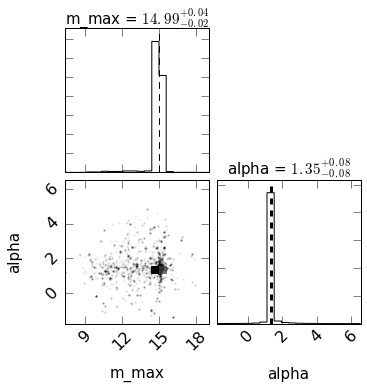

In [43]:
find_theta(1000)

for 10000 data points:
the best fit value to m_max is 15.00
the true value to m_max is 15.00
the best fit value is away from true value of 0.000 sigma

the best fit value to alpha is 1.35
the true value to alpha is 1.35
the best fit value is away from true value of 0.014 sigma


array([[ 11.40392888,   2.64094165],
       [ 11.58983464,   2.87366675],
       [ 11.60445365,   2.90648613],
       ..., 
       [ 15.00705848,   1.3649598 ],
       [ 15.00727374,   1.34727735],
       [ 15.00781448,   1.34253652]])

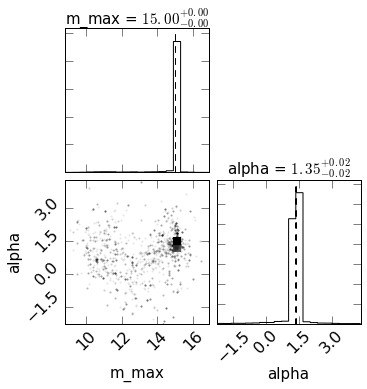

In [44]:
find_theta(10000)